In [77]:
import os
import numpy as np
import warnings
import pandas as pd
import csv
from census import Census
from us import states
from apikey import apikey
import requests
import scipy.stats as stats
import matplotlib.pyplot as plt

#ignore future warnings error
warnings.simplefilter(action='ignore', category=FutureWarning)

c = Census(apikey, year=2017)

In [2]:
# Open and read Texas Graduation Rate data
file = "C:/Users/May 2018/Desktop/SMU Bootcamp Doc/GroupProject/Team6/County_Grad_Data_2017.csv"
HighSchool2017_data = pd.read_csv(file)
HighSchool2017_data.head()

,COUNTY,CNTYNAME,CNTY_ALLD,CNTY_ALLN_CMP2,CNTY_ALLN_GRAD,CNTY_ALLN_CONT,CNTY_ALLN_TXCHSE,CNTY_ALLN_DROP,CNTY_ALLR_CMP2,CNTY_ALLR_GRAD,...,CNTY_TTLN_CONT,CNTY_TTLN_TXCHSE,CNTY_TTLN_DROP,CNTY_TTLR_CMP2,CNTY_TTLR_GRAD,CNTY_TTLR_CONT,CNTY_TTLR_TXCHSE,CNTY_TTLR_DROP,CNTY_TTLR_RAED,CNTY_TTLR_RECADV
0,1,ANDERSON COUNTY,<600,-,-,-,-,-,99.3,96.8,...,-,-,-,99.3,97.6,1.5,0.2,0.7,86.9,88.3
1,2,ANDREWS COUNTY,<250,-,-,-,0,-,97.1,95.8,...,0,0,5,97.8,97.8,0.0,0.0,2.2,-,-
2,3,ANGELINA COUNTY,"1,260","1,203","1,164",32,7,57,95.5,92.4,...,-,-,-,97.4,94.7,2.3,0.4,2.6,79.2,70.5
3,4,ARANSAS COUNTY,<250,-,-,-,-,-,91.0,88.7,...,-,-,-,91.0,88.7,1.4,0.9,9.0,82.2,82.7
4,5,ARCHER COUNTY,<200,-,-,-,0,0,100.0,99.4,...,0,0,0,.,.,.,.,.,.,.


In [3]:
# Create TX graduation data frame
HighSchool2017_dfw = HighSchool2017_data.loc[HighSchool2017_data['CNTYNAME'].isin(['DENTON COUNTY','COLLIN COUNTY','HUNT COUNTY','ROCKWALL COUNTY','KAUFMAN COUNTY','ELLIS COUNTY','JOHNSON COUNTY','DALLAS COUNTY','SOMMERVILLE COUNTY','HOOD','PARKER COUNTY','WISE COUNTY','TARRANT COUNTY'])]
HighSchool2017_dfw = pd.DataFrame(HighSchool2017_dfw)
HighSchool2017_dfw_df = HighSchool2017_dfw.filter(items=['CNTYNAME','CNTY_ALLR_GRAD','CNTY_AAR_GRAD','CNTY_ASR_GRAD',
                                                         'CNTY_HSR_GRAD','CNTY_MUR_GRAD','CNTY_NAR_GRAD','CNTY_PIR_GRAD',
                                                         'CNTY_WHR_GRAD'])
HighSchool2017_dfw_df.rename(columns={'CNTYNAME':'County Name','CNTY_ALLR_GRAD':'All Students','CNTY_AAR_GRAD':'African American',
                             'CNTY_ASR_GRAD':'Asian','CNTY_HSR_GRAD':'Hispanic','CNTY_MUR_GRAD':'Multiracial','CNTY_NAR_GRAD':'American Indian',
                                      'CNTY_PIR_GRAD':'Pacific Islander','CNTY_WHR_GRAD':'White'},inplace=True)
HighSchool2017_dfw_df

,County Name,All Students,African American,Asian,Hispanic,Multiracial,American Indian,Pacific Islander,White
42,COLLIN COUNTY,96.8,95.8,98.6,94.4,98.6,96.8,96.4,97.4
56,DALLAS COUNTY,84.0,80.8,93.5,84.0,81.3,74.4,92.5,87.1
60,DENTON COUNTY,94.5,92.1,96.7,91.4,96.7,95.7,100.0,95.9
69,ELLIS COUNTY,93.1,92.5,100.0,92.0,90.2,87.5,100.0,94.0
115,HUNT COUNTY,93.7,91.7,100.0,95.2,100.0,92.3,100.0,93.0
125,JOHNSON COUNTY,94.7,95.7,91.7,95.2,92.2,100.0,100.0,94.4
128,KAUFMAN COUNTY,95.5,97.0,93.8,94.4,95.1,80.0,100.0,95.8
181,PARKER COUNTY,96.3,97.1,100.0,97.0,97.1,100.0,100.0,96.1
196,ROCKWALL COUNTY,97.0,96.9,97.6,95.2,100.0,100.0,100.0,97.4
217,TARRANT COUNTY,90.5,87.7,94.1,88.2,92.1,90.0,95.6,93.9


In [4]:
# Open and read TX crime data 
TexasCrime2017_data = pd.read_csv("C:/Users/May 2018/Desktop/SMU Bootcamp Doc/GroupProject/Team6/County_crime_data_2017.csv")
TexasCrime2017_data.head()

,Agency Name,Number of Incidents
0,ANDERSON COUNTY,268
1,ANDERSON CO SO,105
2,PALESTINE PD,151
3,FRANKSTON PD,12
4,ANDREWS COUNTY,42


In [5]:
# Create TX crime data frame
DFWCrime2017 = TexasCrime2017_data.loc[TexasCrime2017_data['Agency Name'].isin(['DENTON COUNTY','COLLIN COUNTY','HUNT COUNTY','ROCKWALL COUNTY','KAUFMAN COUNTY','ELLIS COUNTY','JOHNSON COUNTY','DALLAS COUNTY','SOMMERVILLE COUNTY','HOOD','PARKER COUNTY','WISE COUNTY','TARRANT COUNTY'])]
DFWCrime2017_df = pd.DataFrame(DFWCrime2017)
DFWCrime2017_df.columns = ["County Name","Family Violence Incidents"]
DFWCrime2017_df


,County Name,Family Violence Incidents
210,COLLIN COUNTY,"3,227"
264,DALLAS COUNTY,"21,928"
304,DENTON COUNTY,"2,249"
356,ELLIS COUNTY,623
603,HUNT COUNTY,634
639,JOHNSON COUNTY,925
657,KAUFMAN COUNTY,682
855,PARKER COUNTY,520
906,ROCKWALL COUNTY,382
978,TARRANT COUNTY,"13,827"


In [6]:
# Merge TX graduation and crime data
HSGradCrime_2017_df = pd.merge(HighSchool2017_dfw_df,DFWCrime2017_df,on='County Name')
HSGradCrime_2017_df

,County Name,All Students,African American,Asian,Hispanic,Multiracial,American Indian,Pacific Islander,White,Family Violence Incidents
0,COLLIN COUNTY,96.8,95.8,98.6,94.4,98.6,96.8,96.4,97.4,"3,227"
1,DALLAS COUNTY,84.0,80.8,93.5,84.0,81.3,74.4,92.5,87.1,"21,928"
2,DENTON COUNTY,94.5,92.1,96.7,91.4,96.7,95.7,100.0,95.9,"2,249"
3,ELLIS COUNTY,93.1,92.5,100.0,92.0,90.2,87.5,100.0,94.0,623
4,HUNT COUNTY,93.7,91.7,100.0,95.2,100.0,92.3,100.0,93.0,634
5,JOHNSON COUNTY,94.7,95.7,91.7,95.2,92.2,100.0,100.0,94.4,925
6,KAUFMAN COUNTY,95.5,97.0,93.8,94.4,95.1,80.0,100.0,95.8,682
7,PARKER COUNTY,96.3,97.1,100.0,97.0,97.1,100.0,100.0,96.1,520
8,ROCKWALL COUNTY,97.0,96.9,97.6,95.2,100.0,100.0,100.0,97.4,382
9,TARRANT COUNTY,90.5,87.7,94.1,88.2,92.1,90.0,95.6,93.9,"13,827"


In [7]:
# Clean county names to match name style of census
County_Names = ['Collin County, Texas','Dallas County, Texas','Denton County, Texas','Ellis County, Texas','Hunt County, Texas','Johnson County, Texas','Kaufman County, Texas','Parker County, Texas','Rockwall County, Texas','Tarrant County, Texas','Wise County, Texas']
HSGradCrime_2017_df['County'] = County_Names
New_HSGradCrime_2017_df = HSGradCrime_2017_df[['County','All Students','Family Violence Incidents']] 
New_HSGradCrime_2017_df

,County,All Students,Family Violence Incidents
0,"Collin County, Texas",96.8,"3,227"
1,"Dallas County, Texas",84.0,"21,928"
2,"Denton County, Texas",94.5,"2,249"
3,"Ellis County, Texas",93.1,623
4,"Hunt County, Texas",93.7,634
5,"Johnson County, Texas",94.7,925
6,"Kaufman County, Texas",95.5,682
7,"Parker County, Texas",96.3,520
8,"Rockwall County, Texas",97.0,382
9,"Tarrant County, Texas",90.5,"13,827"


In [8]:
# Get DFW counties from API
census_data = c.acs5.get('NAME', geo={'for': 'county:121,085,231,397,257,139,251,113,221,367,497,439', 
                                      'in': 'state:%s' % states.TX.fips})

county_pd = pd.DataFrame(census_data)
county_pd

,NAME,county,state
0,"Hunt County, Texas",231,48
1,"Parker County, Texas",367,48
2,"Collin County, Texas",085,48
3,"Rockwall County, Texas",397,48
4,"Tarrant County, Texas",439,48
5,"Ellis County, Texas",139,48
6,"Wise County, Texas",497,48
7,"Kaufman County, Texas",257,48
8,"Denton County, Texas",121,48
9,"Dallas County, Texas",113,48


In [38]:
# Build census data frame
baseUrl = "https://api.census.gov/data/2017/acs/acs5/subject?get="
baseUrl2 = "https://api.census.gov/data/2017/acs/acsse?get="

#census ids
ids = ["K202002_001E", "K202503_002E", 
       "K202503_003E", "K201001_006E",
       "K201501_007E",  "K200101_001E",
       ]

columns = ['County', 'Median Earnings', '# of Home Owners',
          '# of Renters', '# Divorced', "Education: Bachelor's Degree", 
           "Population" ]

censusDf = pd.DataFrame(columns=columns)


In [39]:
# get data for each id by county and populate dataframe
count = 0

for countyid in county_pd['county']: 
    
    for item in ids:
        targetUrl = (baseUrl2 + item + ",NAME" + "&for=county:" +
                           countyid + "&in=state:48" + "&key=" + apikey)
        resp = requests.get(targetUrl).json()
        
        if resp[0][0] == 'K202002_001E':
            censusDf.set_value(count, "Median Earnings", resp[1][0])
        if  resp[0][0] == 'K202503_002E':   
            censusDf.set_value(count, "# of Home Owners", resp[1][0])
        if  resp[0][0] == 'K202503_003E':     
            censusDf.set_value(count, "# of Renters", resp[1][0])
        if  resp[0][0] == 'K201001_006E':      
            censusDf.set_value(count, "# Divorced", resp[1][0])
        if  resp[0][0] == 'K201501_007E':       
            censusDf.set_value(count, "Education: Bachelor's Degree", resp[1][0])
        if  resp[0][0] == 'K200101_001E':
            censusDf.set_value(count, "Population", resp[1][0])    
    censusDf.set_value(count, "County", resp[1][1])   
    count += 1

In [40]:
censusDf.head(12)

,County,Median Earnings,# of Home Owners,# of Renters,# Divorced,Education: Bachelor's Degree,Population
0,"Hunt County, Texas",33664,64565,26438,9996,8933,93872
1,"Parker County, Texas",35129,106949,24700,14720,16980,133463
2,"Collin County, Texas",50212,665040,301277,71195,211777,969603
3,"Rockwall County, Texas",50215,81035,15124,7145,16124,96788
4,"Tarrant County, Texas",36216,1300652,728517,184351,278693,2054475
5,"Ellis County, Texas",37201,130247,41512,11932,17351,173620
6,"Wise County, Texas",30706,50042,15105,6294,4140,66181
7,"Kaufman County, Texas",36480,97537,23768,11029,11133,122883
8,"Denton County, Texas",43250,579415,244764,66972,166793,836210
9,"Dallas County, Texas",32275,1392954,1194085,216103,327992,2618148


In [41]:
# Merge all three data sets by county name
Merged_3_df = pd.merge(New_HSGradCrime_2017_df,censusDf,on='County')
Merged_3_df

,County,All Students,Family Violence Incidents,Median Earnings,# of Home Owners,# of Renters,# Divorced,Education: Bachelor's Degree,Population
0,"Collin County, Texas",96.8,"3,227",50212,665040,301277,71195,211777,969603
1,"Dallas County, Texas",84.0,"21,928",32275,1392954,1194085,216103,327992,2618148
2,"Denton County, Texas",94.5,"2,249",43250,579415,244764,66972,166793,836210
3,"Ellis County, Texas",93.1,623,37201,130247,41512,11932,17351,173620
4,"Hunt County, Texas",93.7,634,33664,64565,26438,9996,8933,93872
5,"Johnson County, Texas",94.7,925,37424,124558,39913,14701,14394,167301
6,"Kaufman County, Texas",95.5,682,36480,97537,23768,11029,11133,122883
7,"Parker County, Texas",96.3,520,35129,106949,24700,14720,16980,133463
8,"Rockwall County, Texas",97.0,382,50215,81035,15124,7145,16124,96788
9,"Tarrant County, Texas",90.5,"13,827",36216,1300652,728517,184351,278693,2054475


In [46]:
# Caluate new metrics ... just an example - need more
# Home Ownership Ratio (# of Home Owners / # of Renters)
Merged_3_df["Home Ownership Ratio"] = Merged_3_df["# of Home Owners"].astype(int) / Merged_3_df["# of Renters"].astype(int)
Merged_3_df["Divorce %"] = Merged_3_df["# Divorced"].astype(int) / Merged_3_df["Population"].astype(int)
Merged_3_df["Bachelor's degree %"] = Merged_3_df["Education: Bachelor's Degree"].astype(int) / Merged_3_df["Population"].astype(int)
# need to replace ",": Merged_3_df["Family Violence %"] = Merged_3_df["Family Violence Incidents"].astype(int) / Merged_3_df["Population"].astype(int)

Merged_3_df


,County,All Students,Family Violence Incidents,Median Earnings,# of Home Owners,# of Renters,# Divorced,Education: Bachelor's Degree,Population,Home Ownership Ratio,Divorce %,Bachelor's degree %
0,"Collin County, Texas",96.8,"3,227",50212,665040,301277,71195,211777,969603,2.207404,0.073427,0.218416
1,"Dallas County, Texas",84.0,"21,928",32275,1392954,1194085,216103,327992,2618148,1.166545,0.082540,0.125276
2,"Denton County, Texas",94.5,"2,249",43250,579415,244764,66972,166793,836210,2.367239,0.080090,0.199463
3,"Ellis County, Texas",93.1,623,37201,130247,41512,11932,17351,173620,3.137575,0.068725,0.099937
4,"Hunt County, Texas",93.7,634,33664,64565,26438,9996,8933,93872,2.442129,0.106485,0.095161
5,"Johnson County, Texas",94.7,925,37424,124558,39913,14701,14394,167301,3.120738,0.087872,0.086037
6,"Kaufman County, Texas",95.5,682,36480,97537,23768,11029,11133,122883,4.103711,0.089752,0.090598
7,"Parker County, Texas",96.3,520,35129,106949,24700,14720,16980,133463,4.329919,0.110293,0.127226
8,"Rockwall County, Texas",97.0,382,50215,81035,15124,7145,16124,96788,5.358040,0.073821,0.166591
9,"Tarrant County, Texas",90.5,"13,827",36216,1300652,728517,184351,278693,2054475,1.785342,0.089731,0.135652


In [55]:
# Final data frame for analysis and graphs
Final_df = Merged_3_df[['County','All Students','Family Violence Incidents','Median Earnings','Home Ownership Ratio', "Bachelor's degree %",'Divorce %']]

# Sets index to counties
Final_df = Final_df.set_index('County')
Final_df

,All Students,Family Violence Incidents,Median Earnings,Home Ownership Ratio,Bachelor's degree %,Divorce %
County,,,,,,
"Collin County, Texas",96.8,"3,227",50212,2.207404,0.218416,0.073427
"Dallas County, Texas",84.0,"21,928",32275,1.166545,0.125276,0.082540
"Denton County, Texas",94.5,"2,249",43250,2.367239,0.199463,0.080090
"Ellis County, Texas",93.1,623,37201,3.137575,0.099937,0.068725
"Hunt County, Texas",93.7,634,33664,2.442129,0.095161,0.106485
"Johnson County, Texas",94.7,925,37424,3.120738,0.086037,0.087872
"Kaufman County, Texas",95.5,682,36480,4.103711,0.090598,0.089752
"Parker County, Texas",96.3,520,35129,4.329919,0.127226,0.110293
"Rockwall County, Texas",97.0,382,50215,5.358040,0.166591,0.073821


In [21]:
# Correlation stats
CorrelationA = stats.pearsonr(Merged_3_df['All Students'],Merged_3_df['Home Ownership Ratio'])
CorrelationA

(0.7076821446683096, 0.01483829865541533)

In [51]:
# ANOVA stats
ANOVA = stats.f_oneway(Merged_3_df['All Students'],Merged_3_df['Home Ownership Ratio'],Merged_3_df['Divorce %'], Merged_3_df["Bachelor's degree %"],Merged_3_df['Median Earnings'].astype(int))
ANOVA

F_onewayResult(statistic=366.06593784622777, pvalue=2.345163286242506e-36)

In [64]:
# A: Graduation Rate vs. Median Earnings Stats
slope, intercept, r_value, p_value, std_err = stats.linregress(Merged_3_df['All Students'],Merged_3_df['Median Earnings'].astype(int))
A_correlation = r_value
A_r_squared = r_value**2
print(f'Graduation Rate vs. Median Earnings')
print(f'Slope: {slope} | Intercept: {intercept} | Correlation: {A_correlation} | R^2: {A_r_squared} | P_value: {p_value}')

Graduation Rate vs. Median Earnings
Slope: 768.176125097262 | Intercept: -33683.95312617659 | Correlation: 0.4391397132864152 | R^2: 0.19284368778527497 | P_value: 0.17659517645417003


In [65]:
# B: Graduation Rate vs. Home Ownership Ratio Stats
slope, intercept, r_value, p_value, std_err = stats.linregress(Merged_3_df['All Students'],Merged_3_df['Home Ownership Ratio'])
B_correlation = r_value
B_r_squared = r_value**2
print(f'Graduation Rate vs. Home Ownership Ratio')
print(f'Slope: {slope} | Intercept: {intercept} | Correlation: {B_correlation} | R^2: {B_r_squared} | P_value: {p_value}')

Graduation Rate vs. Home Ownership Ratio
Slope: 0.22653524106148154 | Intercept: -18.237396290369766 | Correlation: 0.7076821446683096 | R^2: 0.5008140178823383 | P_value: 0.014838298655415319


In [66]:
# C: Graduation Rate vs. Divorce %
slope, intercept, r_value, p_value, std_err = stats.linregress(Merged_3_df['All Students'],Merged_3_df['Divorce %'])
C_correlation = r_value
C_r_squared = r_value**2
print(f'Graduation Rate vs. Divorce %')
print(f'Slope: {slope} | Intercept: {intercept} | Correlation: {C_correlation} | R^2: {C_r_squared} | P_value: {p_value}')

Graduation Rate vs. Home Ownership Ratio
Slope: 0.00030453405601715535 | Intercept: 0.05848608585577483 | Correlation: 0.08729514482747412 | R^2: 0.007620442310449682 | P_value: 0.7985552402845775


In [68]:
# D: Graduation Rate vs. Bachelor's Degree %
slope, intercept, r_value, p_value, std_err = stats.linregress(Merged_3_df['All Students'],Merged_3_df["Bachelor's degree %"])
D_correlation = r_value
D_r_squared = r_value**2
print(f"Graduation Rate vs. Bachelor's Degree %")
print(f'Slope: {slope} | Intercept: {intercept} | Correlation: {D_correlation} | R^2: {D_r_squared} | P_value: {p_value}')

Graduation Rate vs. Bachelor's Degree %
Slope: 0.0012610327650832418 | Intercept: 0.009513153727988555 | Correlation: 0.09767837281651702 | R^2: 0.009541064516082491 | P_value: 0.775097655672705


In [70]:
# E: Graduation Rate vs. Crime
# slope, intercept, r_value, p_value, std_err = stats.linregress(Merged_3_df['All Students'],Merged_3_df["Family Violence Incidents"])
#E_correlation = r_value
#E_r_squared = r_value**2
#print(f'Graduation Rate vs. Family Violence Incidents')
#print(f'Slope: {slope} | Intercept: {intercept} | Correlation: {E_correlation} | R^2: {E_r_squared} | P_value: {p_value}')

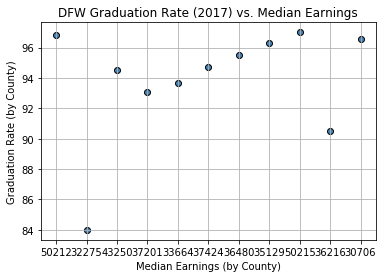

In [102]:
# Build a scatter plot: Median Earnings
plt.scatter(Merged_3_df["Median Earnings"],Merged_3_df["All Students"], marker="o", color="steelblue", edgecolors="black")

# Scatter plot no. 1 - graph properties
plt.title("DFW Graduation Rate (2017) vs. Median Earnings")
plt.ylabel("Graduation Rate (by County)")
plt.xlabel("Median Earnings (by County)")
plt.grid(True)

# Save the figures
plt.savefig("...GradRateVsMedIncome.png")

# Show plot
plt.show()

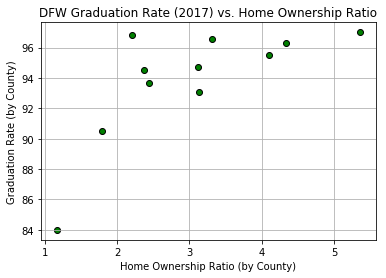

In [103]:
# Build a scatter plot: Home Ownership Ratio
plt.scatter(Merged_3_df["Home Ownership Ratio"],Merged_3_df["All Students"], marker="o", color="green", edgecolors="black")

# Scatter plot no. 1 - graph properties
plt.title("DFW Graduation Rate (2017) vs. Home Ownership Ratio")
plt.ylabel("Graduation Rate (by County)")
plt.xlabel("Home Ownership Ratio (by County)")
plt.grid(True)

# Save the figures
#plt.savefig("...GradRateVsMedIncome.png")

# Show plot
plt.show()

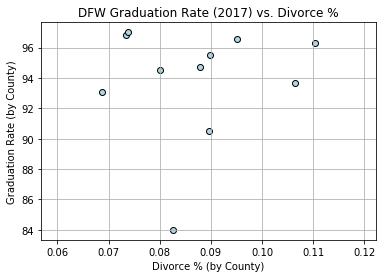

In [108]:
# Build a scatter plot: Divorce %
plt.scatter(Merged_3_df["Divorce %"],Merged_3_df["All Students"], marker="o", color="lightblue", edgecolors="black")

# Scatter plot no. 1 - graph properties
plt.title("DFW Graduation Rate (2017) vs. Divorce %")
plt.ylabel("Graduation Rate (by County)")
plt.xlabel("Divorce % (by County)")
plt.grid(True)

# Save the figures
#plt.savefig("...GradRateVsMedIncome.png")

# Show plot
plt.show()

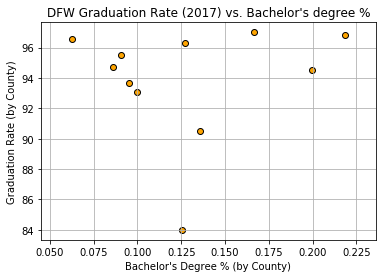

In [109]:
# Build a scatter plot: Bachelor's Degree %
plt.scatter(Merged_3_df["Bachelor's degree %"],Merged_3_df["All Students"], marker="o", color="orange", edgecolors="black")

# Scatter plot no. 1 - graph properties
plt.title("DFW Graduation Rate (2017) vs. Bachelor's degree %")
plt.ylabel("Graduation Rate (by County)")
plt.xlabel("Bachelor's Degree % (by County)")
plt.grid(True)

# Save the figures
#plt.savefig("...GradRateVsMedIncome.png")

# Show plot
plt.show()

In [83]:
MetricNames = ["Median Earnings", "Home Ownership Ratio", "% Divorce", "% Bachelor's Degree"] 
CorrelationList = [A_correlation, B_correlation, C_correlation, D_correlation] 
RSquaredList = [A_r_squared, B_r_squared, C_r_squared, D_r_squared]

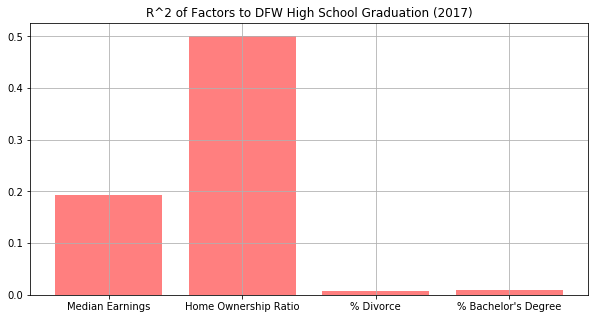

In [99]:
# Build a bar chart: R^2
plt.figure(figsize=(10,5))
plt.bar(MetricNames, RSquaredList, color='r', alpha=0.5, align="center")


# Scatter plot no. 1 - graph properties
plt.title("R^2 of Factors to DFW High School Graduation (2017)")
plt.grid(True)

# Save the figures
#plt.savefig("...png")

# Show plot
plt.show()

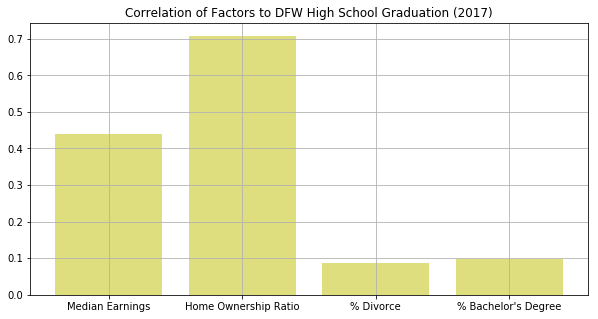

In [106]:
# Build a bar chart: Correlation
plt.figure(figsize=(10,5))
plt.bar(MetricNames, CorrelationList, color='y', alpha=0.5, align="center")

# Scatter plot no. 1 - graph properties
plt.title("Correlation of Factors to DFW High School Graduation (2017)")
plt.grid(True)

# Save the figures
#plt.savefig("...png")

# Show plot
plt.show()